In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Benkyou/Re-Check Notebooks/weatherHistory.csv')

In [4]:
data1 = data.drop(['Formatted Date','Loud Cover','Daily Summary','Apparent Temperature (C)','Wind Bearing (degrees)','Wind Speed (km/h)','Precip Type'],axis = 1)

In [5]:
data1

,Summary,Temperature (C),Humidity,Visibility (km),Pressure (millibars)
0,Partly Cloudy,9.472222,0.89,15.8263,1015.13
1,Partly Cloudy,9.355556,0.86,15.8263,1015.63
2,Mostly Cloudy,9.377778,0.89,14.9569,1015.94
3,Partly Cloudy,8.288889,0.83,15.8263,1016.41
4,Mostly Cloudy,8.755556,0.83,15.8263,1016.51
...,...,...,...,...,...
96448,Partly Cloudy,26.016667,0.43,16.1000,1014.36
96449,Partly Cloudy,24.583333,0.48,15.5526,1015.16
96450,Partly Cloudy,22.038889,0.56,16.1000,1015.66
96451,Partly Cloudy,21.522222,0.60,16.1000,1015.95


In [6]:
data1.dropna(inplace=True)

In [7]:
data1.isna().sum()

Summary                 0
Temperature (C)         0
Humidity                0
Visibility (km)         0
Pressure (millibars)    0
dtype: int64

In [8]:
data2 = data

In [9]:
data2.dropna(inplace=True)

In [10]:
labelencoder = LabelEncoder()
data2['Precip Type'] = labelencoder.fit_transform(data2['Precip Type'])
data2['Summary'] = labelencoder.fit_transform(data2['Summary'])
data2['Daily Summary'] = labelencoder.fit_transform(data2['Daily Summary'])


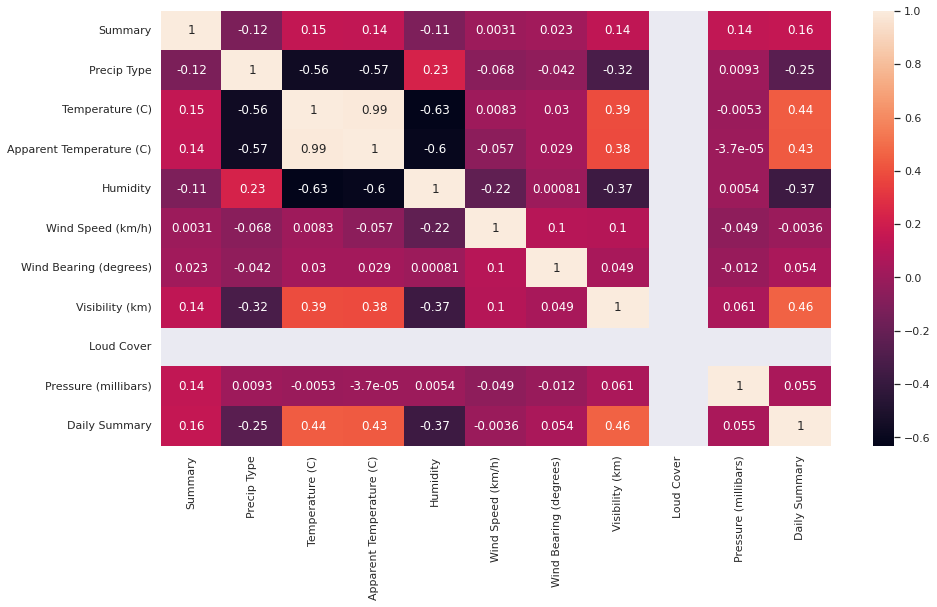

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [15]:
data1['Summary'] = labelencoder.fit_transform(data1['Summary'])

In [16]:
data1['Summary'].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [17]:
x = data1.drop(['Summary'],axis = 1)
y = data1['Summary']

In [20]:
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
pred = model.predict([[9.472222,0.89,15.8263,1015.13]])

In [22]:
pred


array([19])

In [23]:
print(labelencoder.inverse_transform(pred))

['Partly Cloudy']


In [24]:
pickle.dump(model,open('weather.pk','wb'))

In [25]:
labelencoder.classes_

array(['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
       'Breezy and Mostly Cloudy', 'Breezy and Overcast',
       'Breezy and Partly Cloudy', 'Clear',
       'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry',
       'Dry and Mostly Cloudy', 'Dry and Partly Cloudy', 'Foggy',
       'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
       'Overcast', 'Partly Cloudy', 'Rain', 'Windy', 'Windy and Dry',
       'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast',
       'Windy and Partly Cloudy'], dtype=object)